# <center> 📺Netflix Movie Recommendation System😎🍿

Netflix is the world's leading streaming entertainment service with 208 million paid memberships in over 190 countries enjoying TV series, documentaries and feature films across a wide variety of genres and languages. Members can watch as much as they want, anytime, anywhere, on any internet-connected screen. Members can play, pause and resume watching, all without commercials or commitments.

### Here I have done a detailed analysis of netflix content data with awesome visualizations and built a Recommendation System.

# <center> 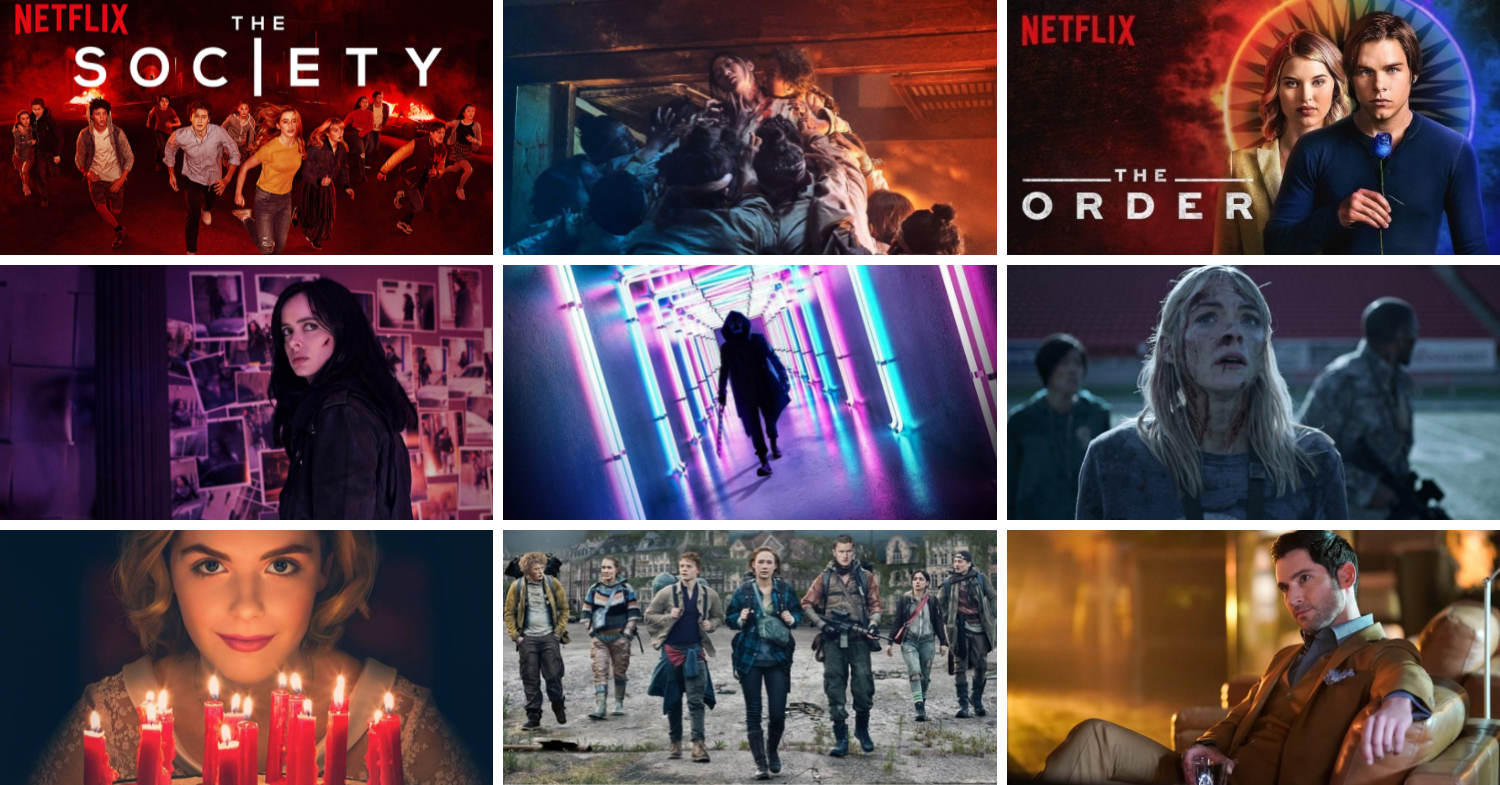

## 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


### Reading Data

In [2]:
df = pd.read_csv("/content/sample_data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## 2. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### --> Checking for missing values

In [4]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, 'COLUMN WISE MISSING VALUES')

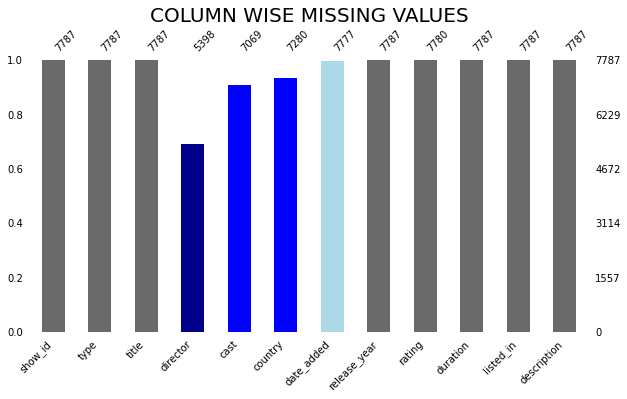

In [5]:
# Plot missing values in columns
import missingno #Python library for the exploratory visualization of missing data #install using !pip install missingno
color= ['dimgrey','dimgrey','dimgrey','darkblue','blue','blue','lightblue','dimgrey','dimgrey','dimgrey','dimgrey','dimgrey']
missingno.bar(df,fontsize=10,color=color,figsize=(10,5))
plt.title('COLUMN WISE MISSING VALUES',fontsize=20)

- There are missing values in column director,cast,country and date_added.
- We can't randomly fill the missing values in columns of director and cast, so we can drop them.
- For minimal number of missing values in country and date_added,rating, we can fill them using mode(most common value) and mean.

### --> Handling missing values

In [6]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['country'].mode()[0])

In [7]:
df = df.dropna( how='any',subset=['cast', 'director'])

In [8]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

- All the missing values in the dataset have either been removed or filled. There are no missing values left.

In [9]:
df.duplicated().sum()

0

- dataset has 0 duplicated values.

### --> Cleaning the data

Adding some new columns:
- listed_in - Genre
* Year Added - year_add
* Month Added - month_add
* Princial Country - country_main 

In [10]:
#Rename the 'listed_in' column as 'Genre' for easy understanding
df = df.rename(columns={"listed_in":"Genre"})
df['Genre'] = df['Genre'].apply(lambda x: x.split(",")[0])
df['Genre'].head()

1                    Dramas
2             Horror Movies
3        Action & Adventure
4                    Dramas
5    International TV Shows
Name: Genre, dtype: object

In [11]:
df['year_add'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_add'].head()

1    2016
2    2018
3    2017
4    2020
5    2017
Name: year_add, dtype: object

In [12]:
df['month_add'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_add'].head()

1    December
2    December
3    November
4     January
5        July
Name: month_add, dtype: object

In [13]:
df['country_main'] = df['country'].apply(lambda x: x.split(",")[0])
df['country_main'].head()

1           Mexico
2        Singapore
3    United States
4    United States
5           Turkey
Name: country_main, dtype: object

In [14]:
df['type'].value_counts()

Movie      4834
TV Show     145
Name: type, dtype: int64

In [15]:
df['rating'].value_counts()

TV-MA            1724
TV-14            1183
R                 656
TV-PG             426
PG-13             378
PG                241
TV-Y               90
TV-G               85
TV-Y7              82
NR                 62
G                  38
UR                  5
United States       4
TV-Y7-FV            3
NC-17               2
Name: rating, dtype: int64

-- Making two new dataframes, one with movies collection and other with TV shows collection:
* movie_df
* tv_df

In [16]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [17]:
movie_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,year_add,month_add,country_main
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016,December,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018,December,Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017,November,United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,United States
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,Horror Movies,"After an awful accident, a couple admitted to ...",2020,June,Egypt


## 3. Exploratory Data Analysis

### --> Number of Movies vs TV Shows

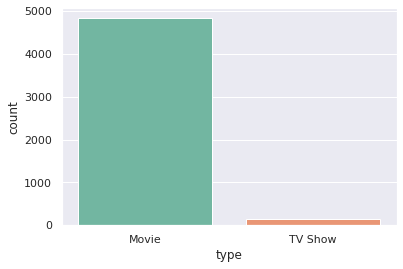

In [18]:
sb.set(style="darkgrid")
sb.countplot(x="type", data= df, palette="Set2")

- There are more Movies on Netflix than TV shows.

### --> Movies & TV Shows Ratings analysis

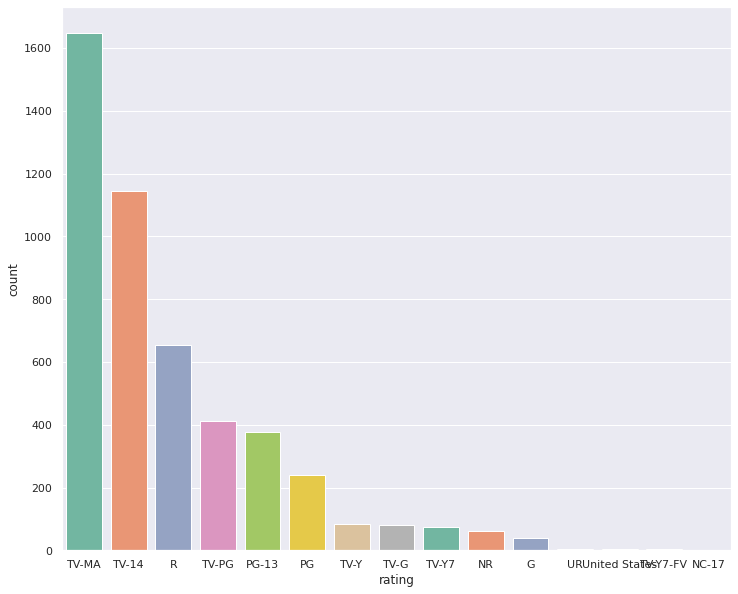

In [19]:
#MOVIES RATINGS
plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(x="rating", data= movie_df, palette="Set2", order=movie_df['rating'].value_counts().index[0:15])

- The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only. 
- Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.
- Third largest is the  very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17.

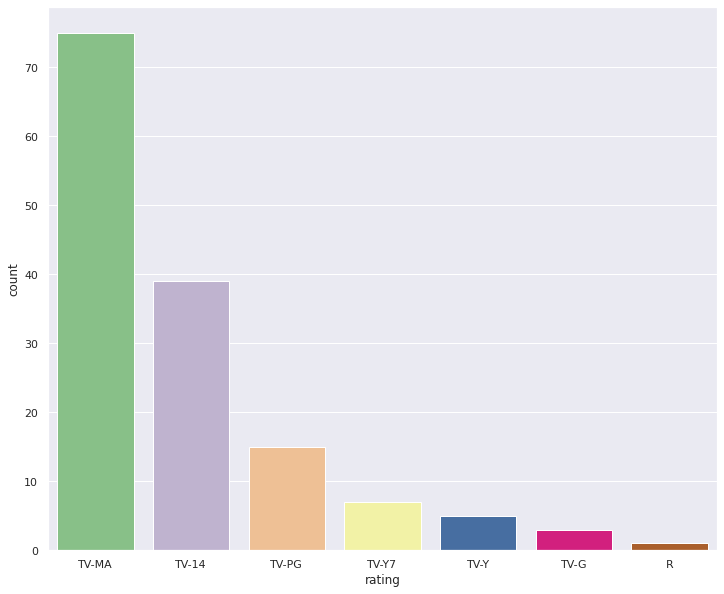

In [20]:
# TV SHOWS RATINGS
plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(x="rating", data=tv_df, palette="Accent", order=tv_df['rating'].value_counts().index[0:15])

- Most of the TV Shows has 'TV-14' ratings which stands for the content can be inappropriate for children under 14 years of age.
- Second highest count of ratings in TV Shows is 'TV-MA', for which the content is for matured audience only.
- TV Shows has least amount of counts with 'R' ratings.

### --> Yearly Analysis of content

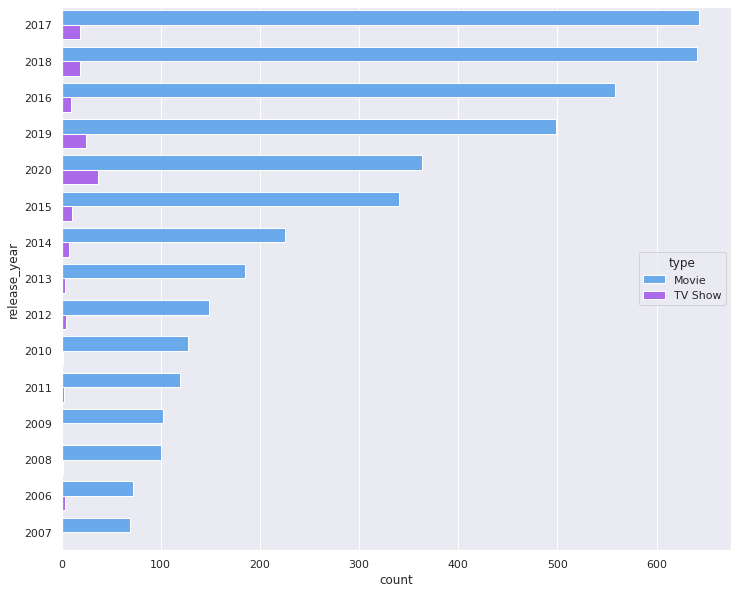

In [21]:
plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(y="release_year", data= df, palette="cool", order= df['release_year'].value_counts().index[0:15],hue=df['type'])

- We can see that Netflix released most number of content in year 2017.
- Noticeable growth in releasing content can be seen from the year 2015.

### --> Analysis of movies duration

In [22]:
movie_df['duration']=movie_df['duration'].str.replace(' min','')
movie_df['duration']=movie_df['duration'].astype(str).astype(int)
movie_df['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7778     88
7780     94
7781     88
7782     99
7783    111
Name: duration, Length: 4834, dtype: int64

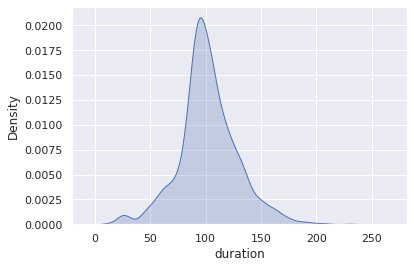

In [23]:
sb.set(style="darkgrid")
sb.kdeplot(data=movie_df['duration'], shade=True)

- So, a good amount of movies on Netflix are among the **duration of 75-120 mins.**

### --> Trends of movies duration

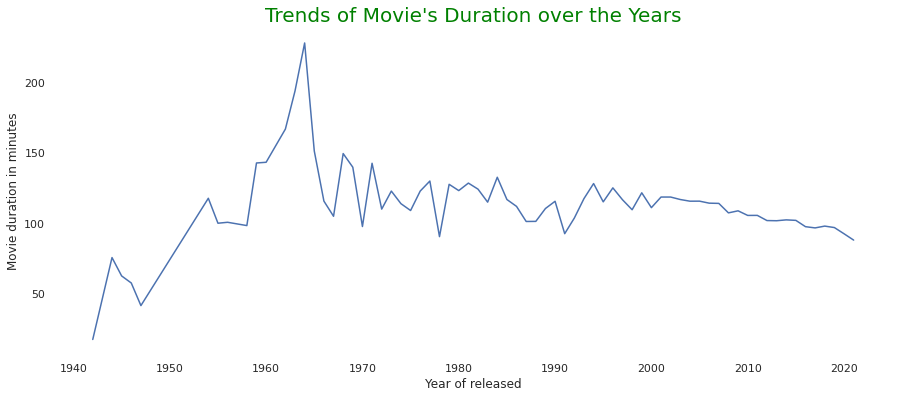

In [24]:
duration_year = movie_df.groupby(['release_year']).mean()
duration_year = duration_year.sort_index()

plt.figure(figsize=(15,6))
sb.lineplot(x=duration_year.index, y=duration_year.duration.values)
plt.box(on=None)
plt.ylabel('Movie duration in minutes');
plt.xlabel('Year of released');
plt.title("Trends of Movie's Duration over the Years", fontsize=20, color='Green');

- In the years of **1960 to 1965**, Movies durations were over **200 minutes, after 1965 the durations became comparitively shorter.**
- From the year **1980**, we can see consistent trend of movie durations, of which duration time is around in **between 100-150 minutes.**

### --> Analysis of TV Shows with most number of seasons

In [25]:
tv_df['duration']=tv_df['duration'].str.replace(' Season','')
tv_df['duration']=tv_df['duration'].str.replace('s','')
tv_df['duration']=tv_df['duration'].astype(str).astype(int)
tv_df['duration']

5       1
132     1
218     1
260     1
276     1
       ..
7385    1
7400    4
7492    1
7666    2
7721    2
Name: duration, Length: 145, dtype: int64

--> Extract TV Shows titles and its number of seasons:

In [26]:
#Extract the columns from tv_df
columns=['title','duration']
tv_shows = tv_df[columns]

In [27]:
#sort the dataframe by number of seasons
tv_shows = tv_shows.sort_values(by='duration',ascending=False)
tv_shows
top20 = tv_shows[0:20]
top20

,title,duration
5912,Supernatural,15
4404,Naruto,9
1181,Call the Midwife,9
584,Arrow,8
6415,The Great British Baking Show,8
5291,Royal Pains,8
6359,The Flash,6
2130,Father Brown,6
1470,Comedians in Cars Getting Coffee,6
2313,Fullmetal Alchemist: Brotherhood,5


<Figure size 720x432 with 0 Axes>

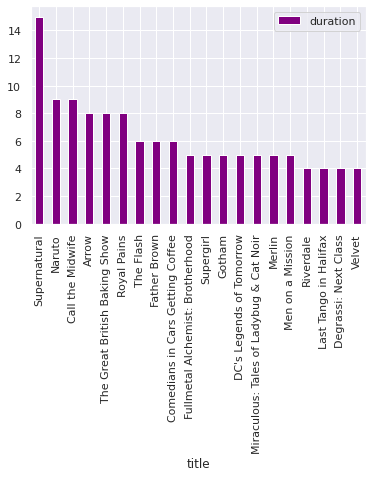

In [28]:
plt.figure(figsize=(10,6))
top20.plot(kind='bar',x='title',y='duration', color='purple')

- **Supernatural , Naruto** has the highest numbers of seasons

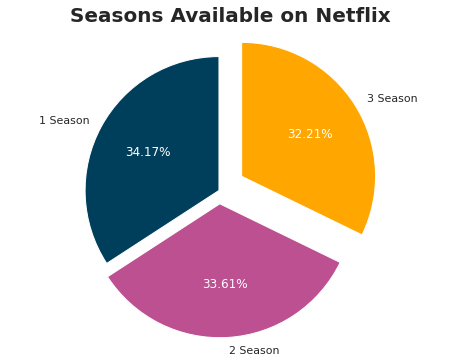

In [29]:
# TV SHOWS AND THEIR SEASONS
plt.figure(figsize=(8, 6))
labels=['1 Season', '2 Season', '3 Season']
_, _, texts = plt.pie(df.duration.value_counts()[:3], labels=labels, autopct='%1.2f%%', startangle=90, 
                      explode=(0.0, 0.1, 0.2), colors=['#003f5c', '#bc5090', '#ffa600'])
plt.axis('equal')
plt.title('Seasons Available on Netflix', fontsize=20, fontweight='bold');
for text in texts:
    text.set_color('white')

- From the chart we can analyze, **35.04% TV Shows has only 1 Season,32.48% TV Shows has 2 seasons and 32.48% Tv Shows has 3 seasons** available

### --> Countries on top for movies content creation

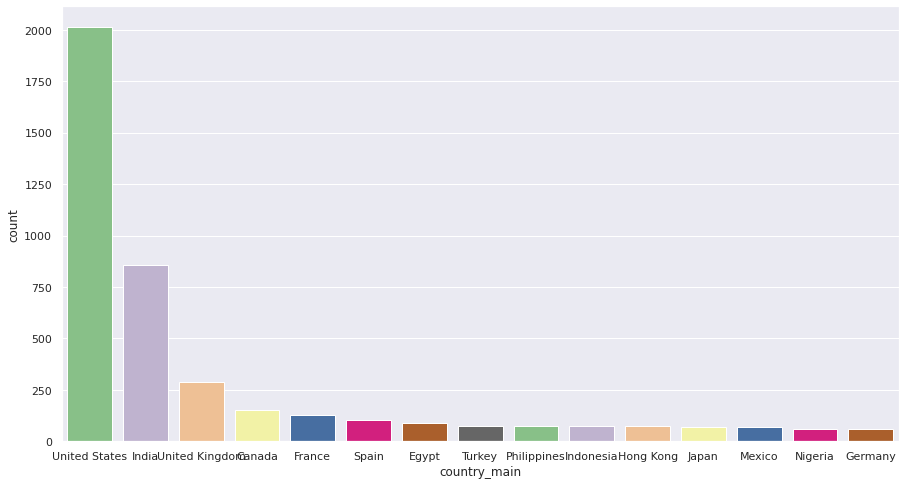

In [30]:
plt.figure(figsize=(15,8))
sb.set(style="darkgrid")
sb.countplot(x="country_main", data=movie_df, palette="Accent", order=movie_df['country_main'].value_counts().index[0:15])

- **United States** creates highest amount of movies followed by ***India and UK.***


### --> Countries on top for TV Show content creation

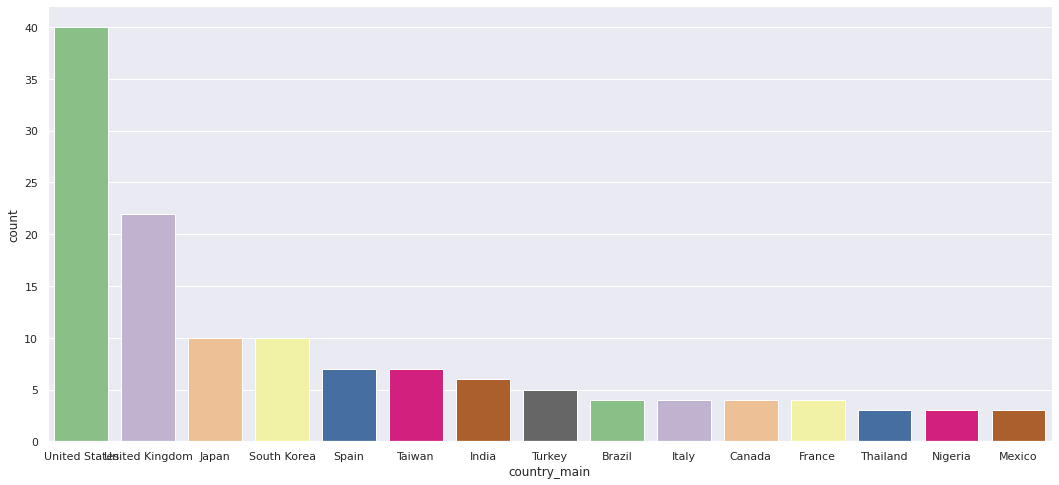

In [31]:
plt.figure(figsize=(18,8))
sb.set(style="darkgrid")
sb.countplot(x="country_main", data=tv_df, palette="Accent", order=tv_df['country_main'].value_counts().index[0:15])

- **United States,United Kingdom,South Korea,Japan** creates most of the amount of TV Shows on netflix.

### -->Understanding what content is available in different countries

In [32]:
# Different Genres from Countries
columns=['Genre','country_main']
gen_country = df[columns]

In [33]:
gen_country.head()

,Genre,country_main
1,Dramas,Mexico
2,Horror Movies,Singapore
3,Action & Adventure,United States
4,Dramas,United States
5,International TV Shows,Turkey


In [34]:
gen_country['Genre'].value_counts()

Dramas                          1372
Comedies                        1054
Action & Adventure               711
Children & Family Movies         453
Documentaries                    365
Stand-Up Comedy                  296
Horror Movies                    243
International Movies             109
Classic Movies                    69
Thrillers                         49
International TV Shows            43
Movies                            32
Crime TV Shows                    31
British TV Shows                  20
Independent Movies                20
Anime Features                    18
Music & Musicals                  17
Kids' TV                          11
Cult Movies                       11
Sci-Fi & Fantasy                  11
Anime Series                       9
Docuseries                         9
Stand-Up Comedy & Talk Shows       7
TV Shows                           6
Romantic Movies                    3
TV Comedies                        3
TV Action & Adventure              2
R

In [35]:
size = gen_country['Genre'].value_counts().tolist()
size

[1372,
 1054,
 711,
 453,
 365,
 296,
 243,
 109,
 69,
 49,
 43,
 32,
 31,
 20,
 20,
 18,
 17,
 11,
 11,
 11,
 9,
 9,
 7,
 6,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 1]

In [37]:
!pip install squarify

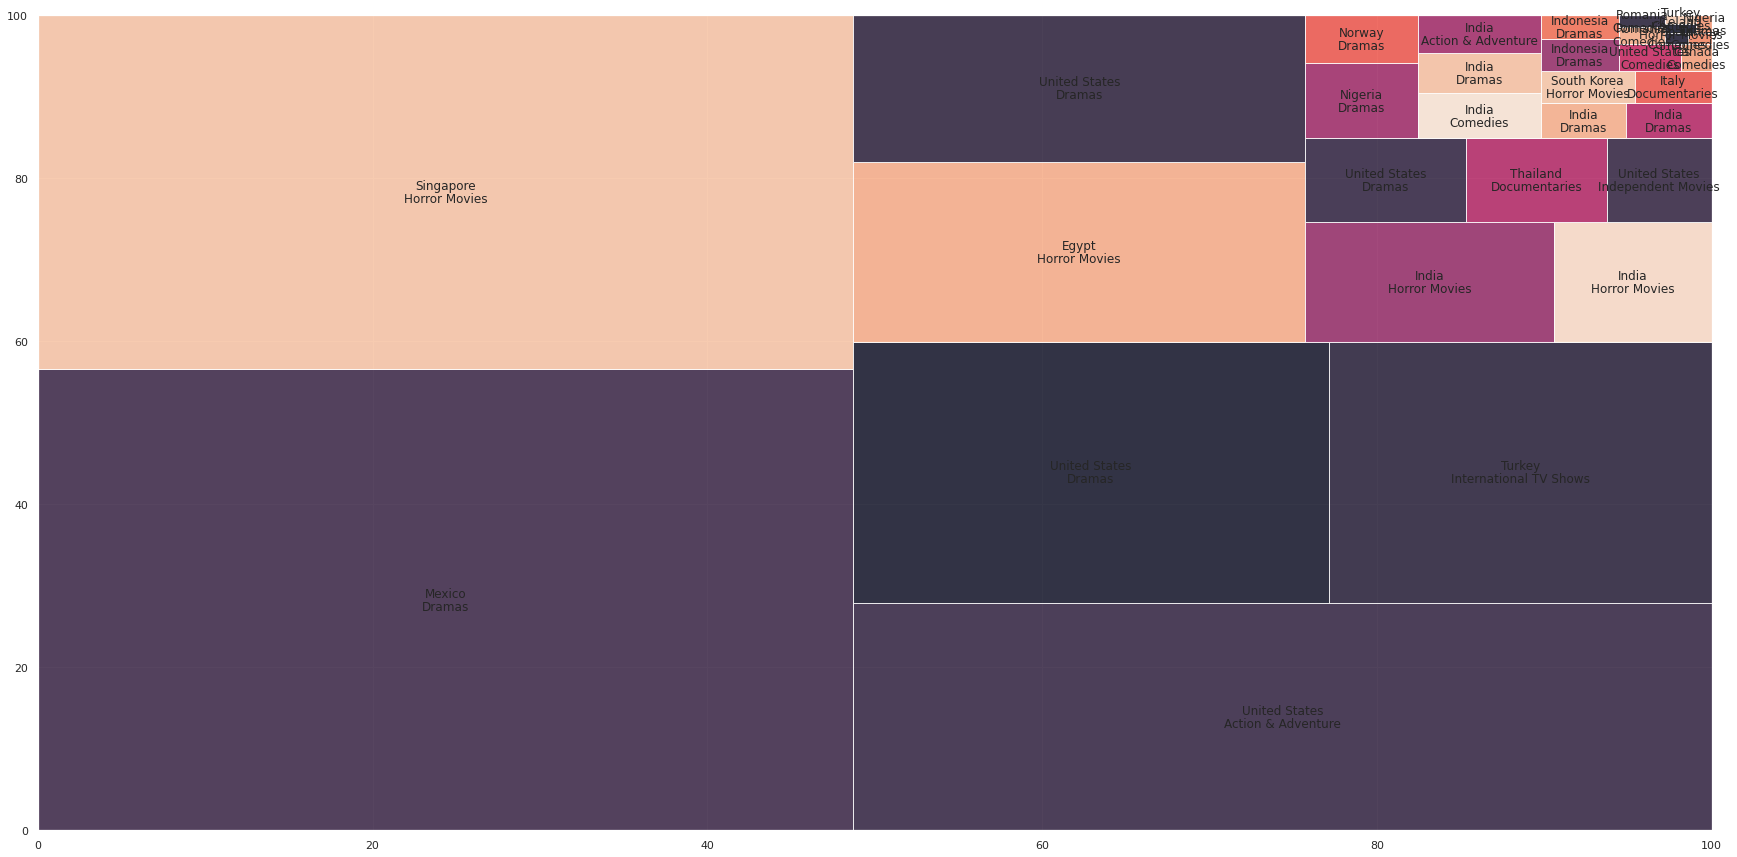

In [38]:
# GENRES BY COUNTRIES
import squarify
plt.figure(figsize=(30,15))
squarify.plot(value= gen_country['Genre'], label= gen_country['country_main'], sizes= size, alpha=0.8)
plt.rc('font', size=14)
plt.show()

### --> Contents released by years

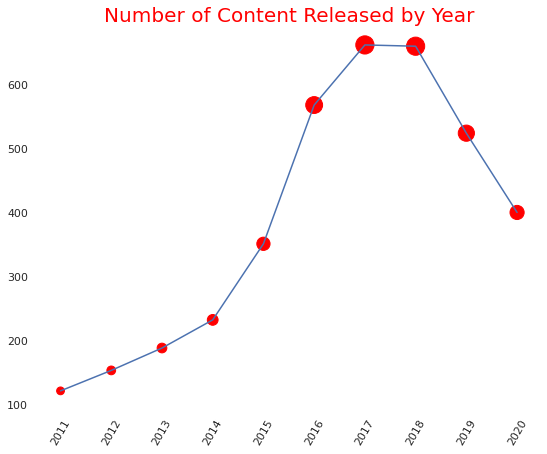

In [40]:
release = df['release_year'].value_counts()
release = release.sort_index(ascending=True)

plt.figure(figsize=(9,7))
plt.plot(release[-11:-1])
plt.scatter(release[-11:-1].index, release[-11:-1].values, s=0.5*release[-11:-1].values, c='Red');
plt.box(on=None);
plt.xticks(rotation = 60)
plt.xticks(release[-11:-1].index);
plt.title('Number of Content Released by Year', color='red', fontsize=20);

### --> Directors with most number of Movies produced

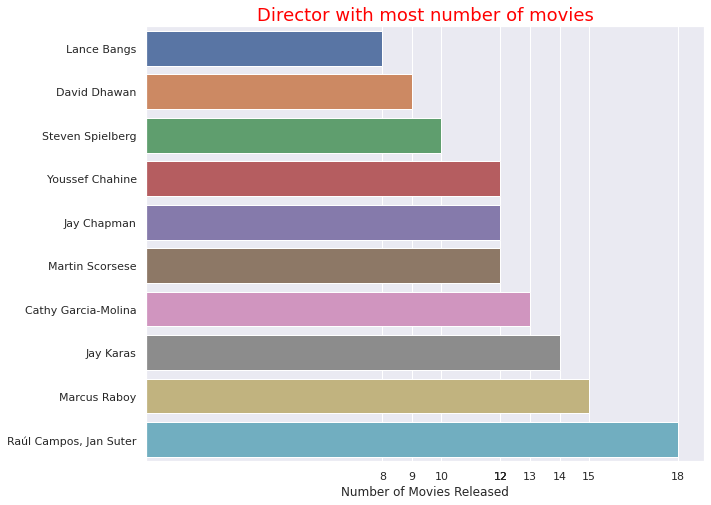

In [43]:
plt.figure(figsize=(10,8))
sb.barplot(y= movie_df.director.value_counts()[:10].sort_values().index, x=movie_df.director.value_counts()[:10].sort_values().values);
plt.title('Director with most number of movies', color='red', fontsize=18)
plt.xticks(movie_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Number of Movies Released');


- Director **Raul Campos,Jan Suter** Produced **highest number of movies: 18** on Netflix till now.

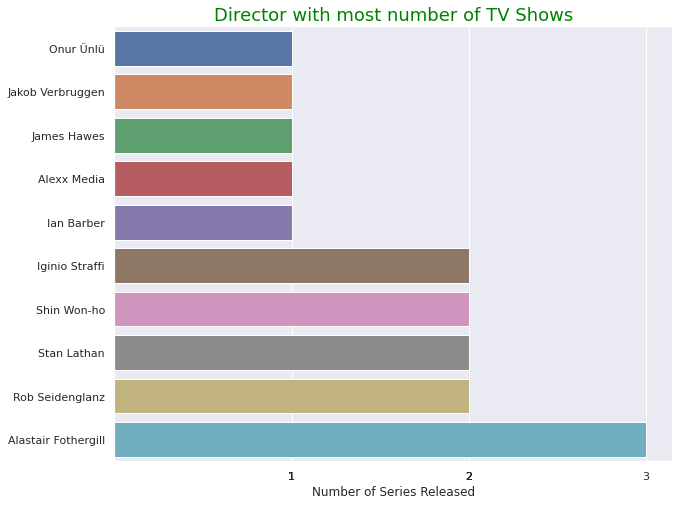

In [44]:
plt.figure(figsize=(10,8))
sb.barplot(y= tv_df.director.value_counts()[:10].sort_values().index, x=tv_df.director.value_counts()[:10].sort_values().values);
plt.title('Director with most number of TV Shows', color='green', fontsize=18)
plt.xticks(tv_df.director.value_counts()[:10].sort_values().values);
plt.xlabel('Number of Series Released');

- Director **Alastair Fothergill** released **highest number of TV shows:3** on Netflix.

### --> Most Popular Genre on Netflix

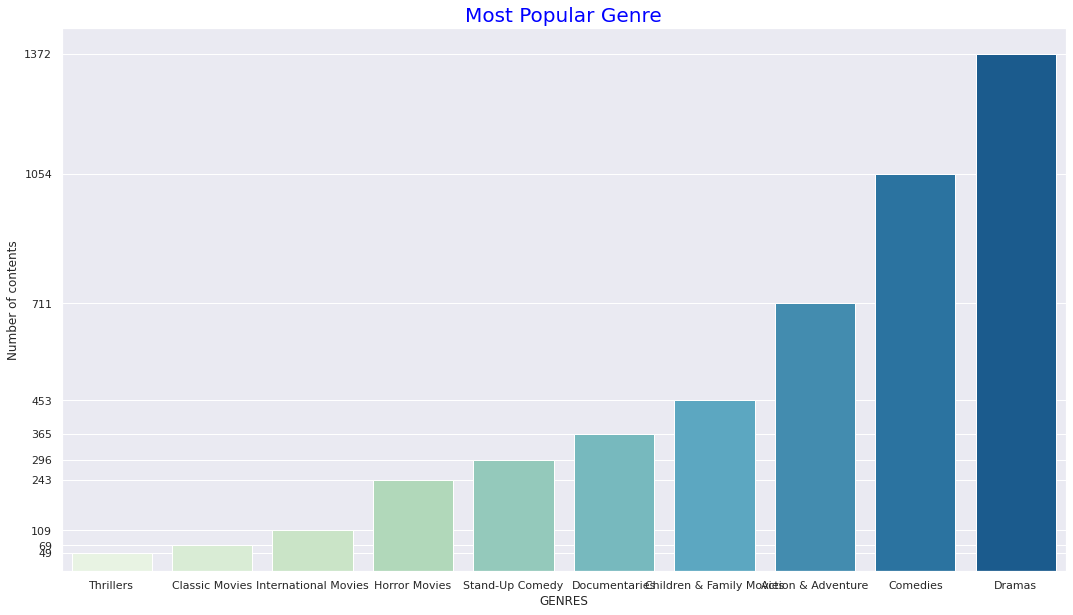

In [45]:
plt.figure(figsize=(18,10))
sb.barplot(x= df.Genre.value_counts()[:10].sort_values().index, y=df.Genre.value_counts()[:10].sort_values().values,palette='GnBu');
plt.title('Most Popular Genre', color='Blue', fontsize=20)
plt.yticks(df.Genre.value_counts()[:10].sort_values().values);
plt.xlabel('GENRES');
plt.ylabel('Number of contents');

- **Netflix knows how much we all love drama..!! :p**

### --> Top Actor/Actresses on Netflix

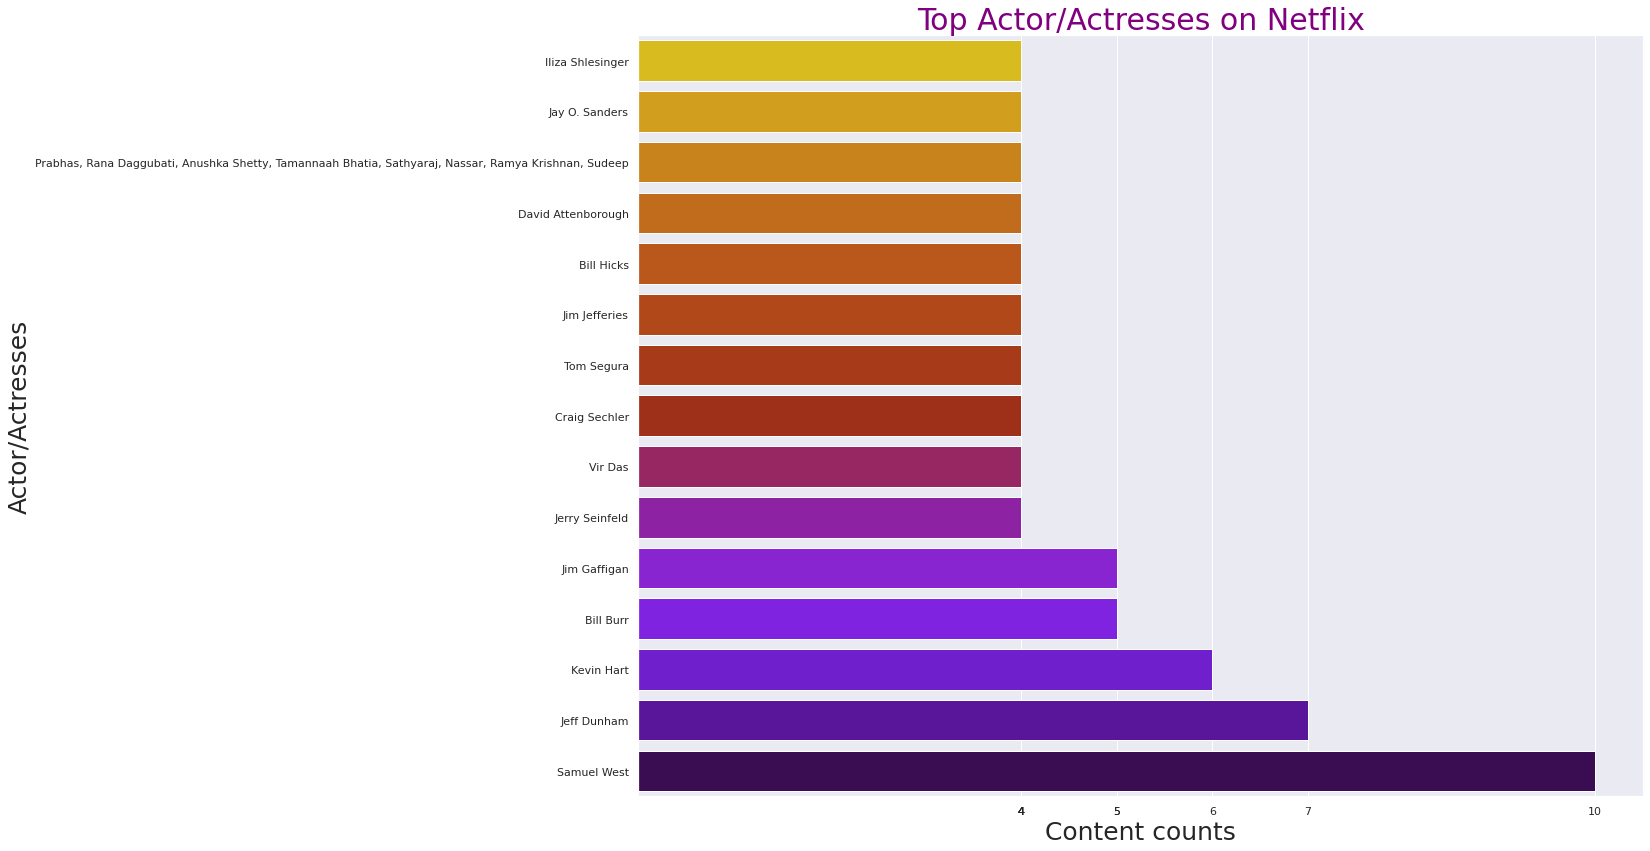

In [47]:
plt.figure(figsize=(18,14))
sb.barplot(y= df.cast.value_counts()[:15].sort_values().index, x=df.cast.value_counts()[:15].sort_values().values,palette='gnuplot_r');
plt.title('Top Actor/Actresses on Netflix', color='purple', fontsize=30)
plt.xticks(df.cast.value_counts()[:10].sort_values().values);
plt.ylabel('Actor/Actresses', fontsize=25);
plt.xlabel('Content counts', fontsize=25);

- Actor **'Samuel West'** has highest number of movies/Tv shows on Netflix.

### --> Best Month for directors to release content

#### We can analyse the months in which least amount of contents are added, that months can be best for directors to release their content for better audience attention.

In [48]:
df_copy = df.copy()
net_date = df_copy[['date_added']]
net_date['year'] = net_date['date_added'].apply(lambda x : x.split(', ')[-1])
net_date['month'] = net_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_copy = net_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T


findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.


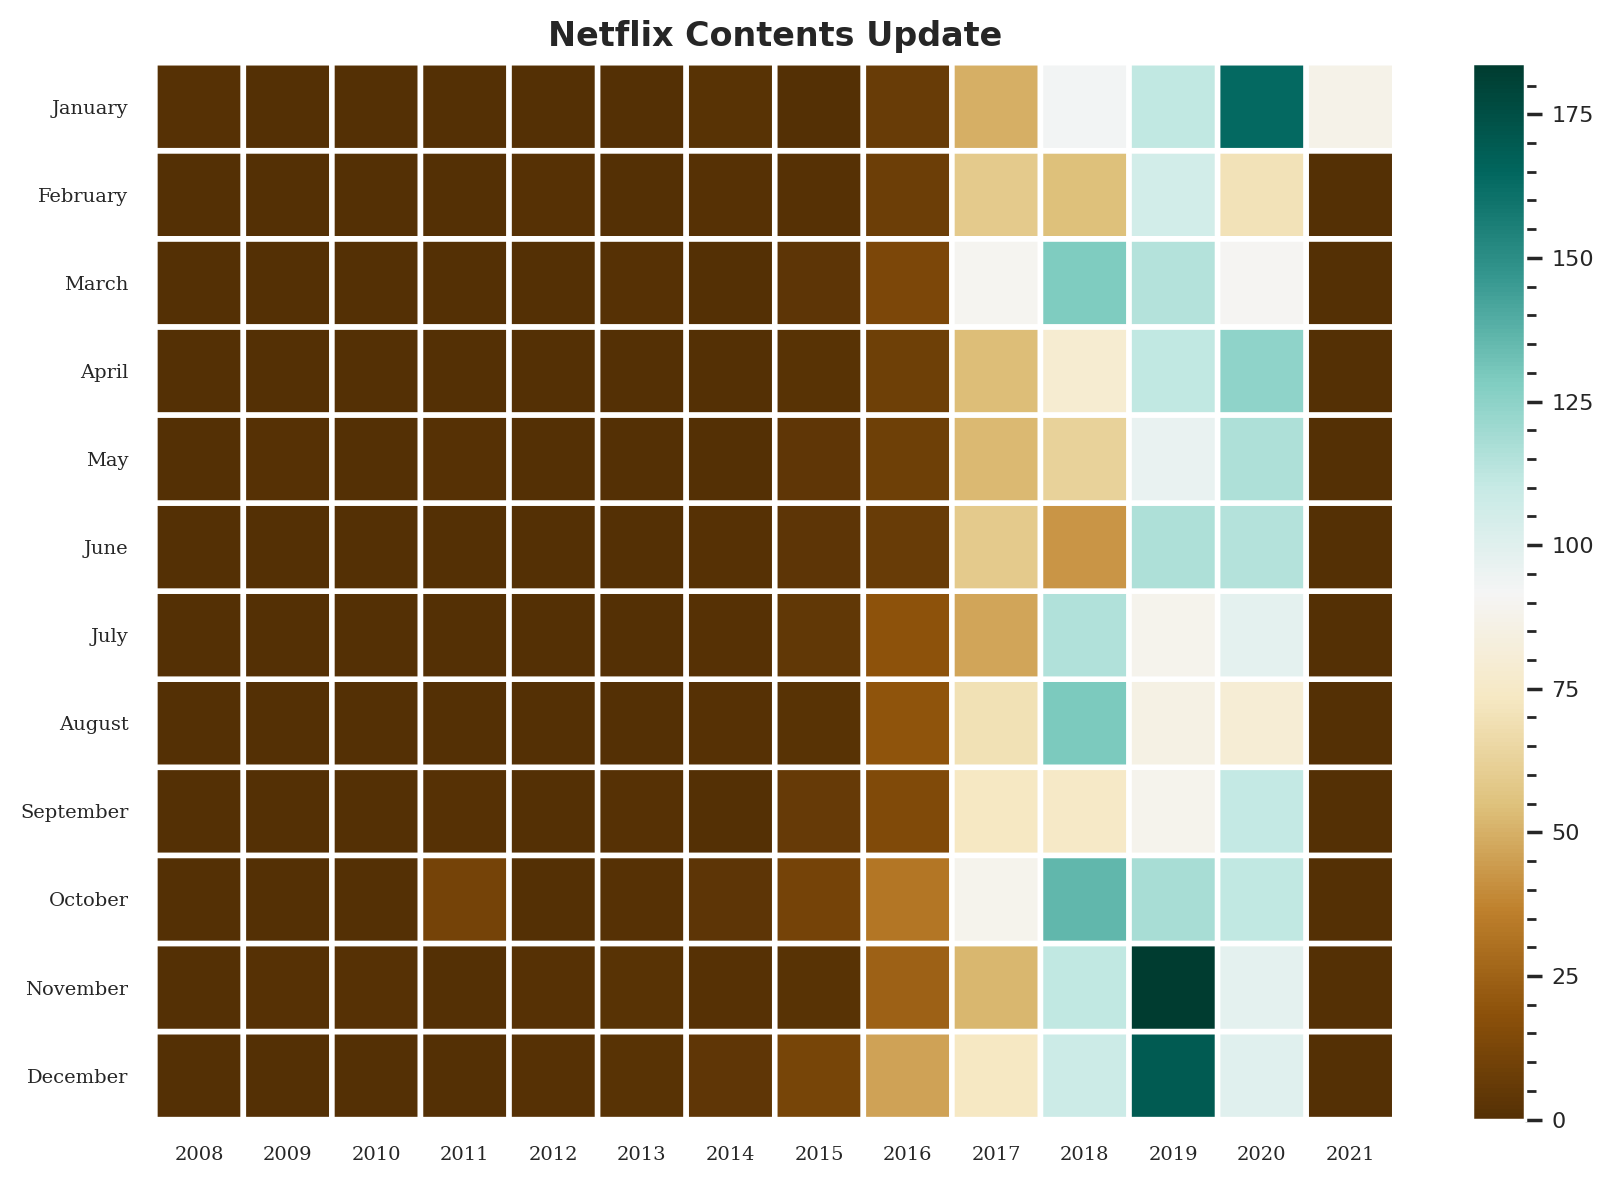

In [49]:
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df_copy, cmap='BrBG', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df_copy.columns), 1), df_copy.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df_copy.index), 1), df_copy.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold')
cbar = plt.colorbar()
cbar.solids.set_edgecolor("face")

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

## 4. Netflix Recommendation System

## Content Based Filtering

- For this recommender system the content of the movie (cast, description, director,genre etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

![](https://miro.medium.com/max/998/1*O_GU8xLVlFx8WweIzKNCNw.png)

## Plot description based Recommender

- We will calculate similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **description** feature of our dataset.

In [50]:
df['description'].head()

1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
5    A genetics professor experiments with a treatm...
Name: description, dtype: object

We need to convert the word vector of each overview.We'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each description.The overall importance of each word to the documents in which they appear is equal to TF * IDF.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

In [52]:
#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4979, 13910)

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.

In [53]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

-- we need a mechanism to identify the index of a movie in our metadata DataFrame, given its title.

In [54]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

-- Let's define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies.

In [55]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [57]:
get_recommendations('#realityhigh')

4427    Natural Selection
4137           Miss India
6156      The Book of Sun
4989           Prom Night
6341     The F**k-It List
765                Battle
1145              Burning
7326             Uncorked
7662              Work It
5242            Rock On!!
Name: title, dtype: object

In [58]:
get_recommendations('PK')

133                                7 años
4803                               Payday
3478                    Kyaa Kool Hai Hum
1243                    Catching Feelings
3940    Mariah Carey's Merriest Christmas
2154                                Fifty
3703                                 Loev
1269                              Chameli
3576         LEGENDS OF THE HIDDEN TEMPLE
7754                                 Yuva
Name: title, dtype: object

- This is completely plot based recommendations. we can see these are not so accurate, so we can try to add more metrics to improve model performance.

## Multiple metrics(Genre,cast,director)  based Recommender System

From the Genre,cast and director features, we need to extract the three most important actors, the director and genres associated with that movie.

In [59]:
features=['Genre','director','cast','description','title']
filters = df[features]

In [60]:
#Cleaning the data by making all the words in lower case.
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [61]:
for feature in features:
    filters[feature] = filters[feature].apply(clean_data)
    
filters.head()

,Genre,director,cast,description,title
1,dramas,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","afteradevastatingearthquakehitsmexicocity,trap...",7:19
2,horrormovies,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","whenanarmyrecruitisfounddead,hisfellowsoldiers...",23:59
3,action&adventure,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","inapostapocalypticworld,rag-dollrobotshideinfe...",9
4,dramas,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",abrilliantgroupofstudentsbecomecard-countingex...,21
5,internationaltvshows,serdarakar,"erdalbeşikçioğlu,yaseminallen,melisbirkan,sayg...",ageneticsprofessorexperimentswithatreatmentfor...,46


- We can now create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer.

In [62]:
def create_soup(x):
    return x['director'] + ' ' + x['cast'] + ' ' +x['Genre']+' '+ x['description']

In [63]:
filters['soup'] = filters.apply(create_soup, axis=1)

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the **CountVectorizer()** instead of TF-IDF.

In [64]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filters['soup'])

In [65]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [66]:
filters

,Genre,director,cast,description,title,soup
1,dramas,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","afteradevastatingearthquakehitsmexicocity,trap...",7:19,"jorgemichelgrau demiánbichir,héctorbonilla,osc..."
2,horrormovies,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","whenanarmyrecruitisfounddead,hisfellowsoldiers...",23:59,"gilbertchan teddchan,stellachung,henleyhii,law..."
3,action&adventure,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","inapostapocalypticworld,rag-dollrobotshideinfe...",9,"shaneacker elijahwood,johnc.reilly,jennifercon..."
4,dramas,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",abrilliantgroupofstudentsbecomecard-countingex...,21,"robertluketic jimsturgess,kevinspacey,katebosw..."
5,internationaltvshows,serdarakar,"erdalbeşikçioğlu,yaseminallen,melisbirkan,sayg...",ageneticsprofessorexperimentswithatreatmentfor...,46,"serdarakar erdalbeşikçioğlu,yaseminallen,melis..."
...,...,...,...,...,...,...
7778,comedies,rubenfleischer,"jesseeisenberg,woodyharrelson,emmastone,abigai...","lookingtosurviveinaworldtakenoverbyzombies,ado...",zombieland,"rubenfleischer jesseeisenberg,woodyharrelson,e..."
7780,dramas,shloksharma,"shashankarora,shwetatripathi,rahulkumar,gopalk...",adrugdealerstartshavingdoubtsabouthistradeashi...,zoo,"shloksharma shashankarora,shwetatripathi,rahul..."
7781,children&familymovies,peterhewitt,"timallen,courteneycox,chevychase,katemara,ryan...","draggedfromcivilianlife,aformersuperheromusttr...",zoom,"peterhewitt timallen,courteneycox,chevychase,k..."
7782,dramas,joseffares,"imadcreidi,antoinetteturk,eliasgergi,carmenleb...","whenlebanon'scivilwardepriveszozoofhisfamily,h...",zozo,"joseffares imadcreidi,antoinetteturk,eliasgerg..."


In [67]:
# Reset index of our main DataFrame and construct reverse mapping as before
filters=filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])

In [68]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [70]:
get_recommendations_new('PK', cosine_sim2)

100                         3 Idiots
6585    The Legend of Michael Mishra
552                Anthony Kaun Hai?
4278                  Mumbai Matinee
1004                    BluffMaster!
2149              Ferrari Ki Sawaari
1271                 Chance Pe Dance
1831                         Dostana
1878                           Drive
1940              Ek Main Aur Ekk Tu
Name: title, dtype: object

In [71]:
get_recommendations_new('Tarzan', cosine_sim2)

5989                                             Tarzan 2
6360                                      The Flintstones
857                         Bethany Hamilton: Unstoppable
2545                                      Growing Up Wild
3861                                               Magnus
5918                                            Surf's Up
1176    Calico Critters: Everyone's Big Dream Flying i...
1589               Dance Dreams: Hot Chocolate Nutcracker
3562                     LeapFrog: Sing-along, Read-along
4241                            Motu Patlu: King of Kings
Name: title, dtype: object

In [74]:
get_recommendations_new('Naruto', cosine_sim2)

4405                    Naruto Shippûden the Movie: Bonds
4410     Naruto the Movie 2: Legend of the Stone of Gelel
4407                      Naruto Shippuden : Blood Prison
4406         Naruto Shippûden the Movie: The Will of Fire
4408                          Naruto Shippuden: The Movie
4411    Naruto the Movie 3: Guardians of the Crescent ...
4409          Naruto Shippuden: The Movie: The Lost Tower
2313                     Fullmetal Alchemist: Brotherhood
6477                                 The Idhun Chronicles
2431                                     Girls und Panzer
Name: title, dtype: object

### This improved Recommendation System works very well.